In [45]:
import pylab
import scipy.signal as signal
import numpy 

print('Simulating heart ecg')

# The "Daubechies" wavelet is a rough approximation to a real,
# single, heart beat ("pqrst") signal
pqrst = signal.wavelets.daub(10)

Simulating heart ecg


In [46]:
pqrst

array([ 2.66700579e-02,  1.88176800e-01,  5.27201189e-01,  6.88459039e-01,
        2.81172344e-01, -2.49846424e-01, -1.95946274e-01,  1.27369340e-01,
        9.30573646e-02, -7.13941472e-02, -2.94575368e-02,  3.32126741e-02,
        3.60655357e-03, -1.07331755e-02,  1.39535175e-03,  1.99240530e-03,
       -6.85856695e-04, -1.16466855e-04,  9.35886703e-05, -1.32642029e-05])

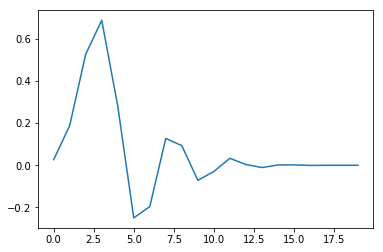

In [47]:
pylab.plot(pqrst)

In [42]:
samples_rest = 10
zero_array = numpy.zeros(samples_rest, dtype=float)
pqrst_full = numpy.concatenate([pqrst,zero_array])

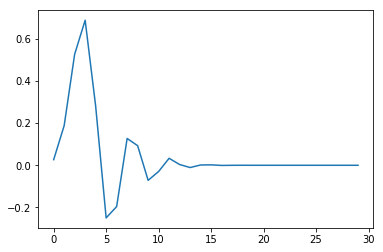

In [43]:
pylab.plot(pqrst_full)

In [50]:
bpm = 60
bps = bpm / 60

# Simumated period of time in seconds that the ecg is captured in
capture_length = 10

# Caculate the number of beats in capture time period 
# Round the number to simplify things
num_heart_beats = int(capture_length * bps)

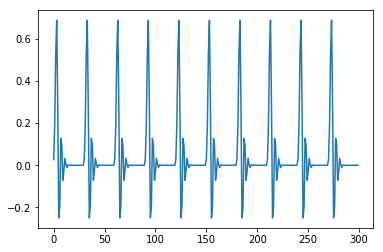

In [55]:
ecg_template = numpy.tile(pqrst_full , num_heart_beats)

# Plot the heart ECG template
pylab.plot(ecg_template)

In [56]:
noise = numpy.random.normal(0, 0.01, len(ecg_template))
ecg_template_noisy = noise + ecg_template

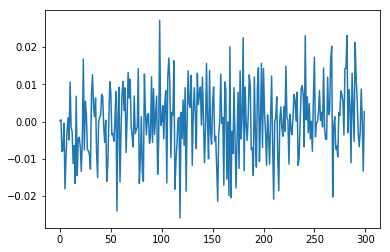

In [58]:
pylab.plot(noise)

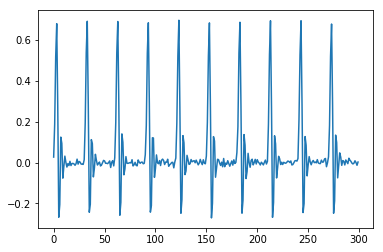

In [59]:
pylab.plot(ecg_template_noisy)

In [60]:
sampling_rate = 50.0
num_samples = sampling_rate * capture_length
ecg_sampled = signal.resample(ecg_template_noisy, int(num_samples))

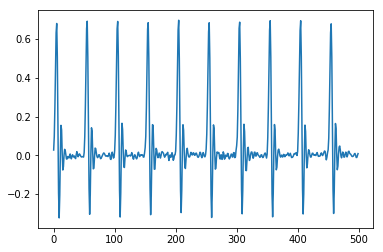

In [64]:
pylab.plot(ecg_sampled)